In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from datetime import date
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
sp_vecs = np.array([[ 2. ,  4. ],
       [-3. ,  3. ],
       [-4. , -3.5]])

In [3]:
class vectors(object):
    """The class takes in vectors and runs various methods 
    for analysis and plotting"""
    
    def plotVectorsOrigin(vecs):
        """Plots all vectors set to origin"""
        # Get min/max x/y values for all vectors.     
        x_min = min(vecs[:,0] - 1)
        x_max = max(vecs[:,0] + 1)
        y_min = min(vecs[:,1] - 1)
        y_max = max(vecs[:,1]+ 1)
        x_range = (x_min, x_max)
        y_range = (y_min, y_max)
        

        fig, ax = plt.subplots(figsize=(6, 6))
        # Set the axes through the origin
        for spine in ['left', 'bottom']:
            ax.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            ax.spines[spine].set_color('none')

        ax.set(xlim=x_range, ylim=y_range)
        ax.grid()    
        for v in vecs:
            ax.annotate('', xy=v, xytext=(0, 0),
                        arrowprops=dict(facecolor='red',
                        shrink=0,
                        alpha=0.7,
                        width=0.5))
            ax.text(1.1 * v[0], 1.1 * v[1], str(v))
        plt.show()

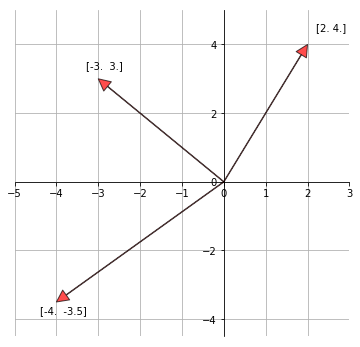

In [4]:
vectors.plotVectorsOrigin(sp_vecs)

In [5]:
help(vectors.plotVectorsOrigin)

Help on function plotVectorsOrigin in module __main__:

plotVectorsOrigin(vecs)
    Plots all vectors set to origin



In [6]:
# import sys

# # Python 2/3 compatibility shim
# if sys.hexversion < 0x3000000:
#     rng = xrange
#     inp = raw_input
# else:
#     rng = range
#     inp = input

# def getter_fn(datatype):
#     if datatype == str:
#         return inp
#     else:
#         def fn(prompt=''):
#             while True:
#                 try:
#                     return datatype(inp(prompt))
#                 except ValueError:
#                     pass
#         return fn

# get_float = getter_fn(float)
# get_int   = getter_fn(int)

# def main():
#     print("Retirement calculator!")

#     principal  = get_float("Initial investment amount? ")
#     periods    = get_int  ("How many years will you make an annual deposit? ")
#     deposit    = get_float("Annual deposit amount? ")
#     apr        = get_float("Annual interest rate (in percent)? ") / 100
#     retirement = get_int  ("Years until retirement? ")

#     deposits    = [deposit] * periods
#     no_deposits = [0.] * (retirement - periods)

#     amount = principal
#     amounts = []
#     for yr, d in enumerate(deposits + no_deposits, 1):
#         amount = (amount + d) * (1. + apr)
#         amounts.append(amount)
#         print('After {:>2d} year{} you have:   $ {:>10.2f}'.format(yr, 's,' if yr > 1 else ', ', amount))

#     fig, ax = plt.subplots(figsize=(6, 6))
#     ax.plot(amounts)
#     #ax1.plot(deposits)    
        
# if __name__ == '__main__':
#     main()

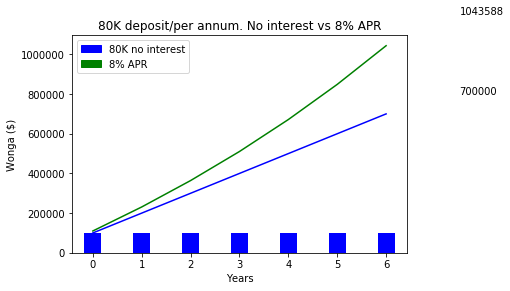

In [21]:
principal, periods, deposit, apr, retirement  = (0, 7, 100000, (10/100), 7)
width = 0.35
deposits    = [deposit] * periods
no_deposits = [0.] * (retirement - periods)

amount = principal
amounts = []
for yr, d in enumerate(deposits + no_deposits, 1):
    amount = (amount + d) * (1. + apr)
    amounts.append(amount)    

blue_patch = mpatches.Patch(color='blue', label='80K no interest')
green_patch = mpatches.Patch(color='green', label='8% APR')

df = pd.DataFrame({'deposits' : deposits, 'amounts' : amounts})
df['cumsumNoAPR'] = df['deposits'].cumsum(axis = 0)

df[['deposits',]].plot(kind='bar', width = width, color='blue')
df['amounts'].plot(kind='line', color='green')
df['cumsumNoAPR'].plot(kind='line', color='blue')

plt.title('80K deposit/per annum. No interest vs 8% APR')
plt.xlabel('Years')
plt.ylabel('Wonga ($)')
plt.legend(handles=[blue_patch, green_patch])

plt.text(7.5, 800000, f'{int(sum(deposits))}')
plt.text(7.5, 1200000, f'{int(amounts[-1])}')
plt.show()     

In [8]:
Interest_Rate = 0.0425
Years = 28
Payments_Year = 12
Principal = 390000
Addl_Principal = 1500
start_date = (date(2018,9,1))

In [9]:
pmt = np.pmt(Interest_Rate/Payments_Year, Years*Payments_Year, Principal)
print(pmt)

-1987.014127530304


In [10]:
# But, how much of this is interest and how much is principal?
# Period to calculate (1 month)
per = 1

# Calculate the interest
ipmt = np.ipmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)

# Calculate the principal
ppmt = np.ppmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)

print(ipmt, ppmt)

-1381.25 -605.764127530304


In [11]:
per = 240 # Period to calculate
# Calculate the interest
ipmt = np.ipmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)

# Calculate the principal
ppmt = np.ppmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)
print(ipmt, ppmt)

-576.8609580838271 -1410.153169446477


In [12]:
rng = pd.date_range(start_date, periods=Years * Payments_Year, freq='MS')
rng.name = "Payment_Date"

In [13]:
df = pd.DataFrame(index=rng,columns=['Payment', 'Principal', 'Interest', 'Addl_Principal', 'Balance'], dtype='float')
df.reset_index(inplace=True)
df.index += 1
df.index.name = "Period"
df["Payment"] = np.pmt(Interest_Rate/Payments_Year, Years*Payments_Year, Principal)
df["Principal"] = np.ppmt(Interest_Rate/Payments_Year, df.index, Years*Payments_Year, Principal)
df["Interest"] = np.ipmt(Interest_Rate/Payments_Year, df.index, Years*Payments_Year, Principal)
# Convert to a negative value in order to keep the signs the same
df["Addl_Principal"] = -Addl_Principal
df = df.round(2)

In [14]:
df["Balance"] = 0
df.loc[1, "Balance"] = Principal + df.loc[1, "Principal"] + df.loc[1, "Addl_Principal"]

In [15]:
for i in range(2, len(df)+1):
    # Get the previous balance as well as current payments
    prev_balance = df.loc[i-1, 'Balance']
    principal = df.loc[i, 'Principal']
    addl_principal = df.loc[i, "Addl_Principal"]

    # If there is no balance, then do 0 out the principal and interest
    if prev_balance == 0:
        df.loc[i, ['Payment', 'Principal', 'Interest', 'Balance', 'Addl_Principal']] = 0
        continue

    # If this payment does not pay it off, reduce the balance
    if abs(principal + addl_principal) <= prev_balance:
        df.loc[i, 'Balance'] = principal + prev_balance + addl_principal

    # If it does pay it off, zero out the balance and adjust the final payment
    else:
        # Just adjust the principal down
        if prev_balance <= abs(principal):
            principal = -prev_balance
            addl_principal = 0
        else:
            # addl_principal = (prev_balance - abs(principal_payment))
            addl_principal = (prev_balance - abs(principal))
        df.loc[i, 'Balance'] = 0
        df.loc[i, 'Principal'] = principal
        df.loc[i, 'Addl_Principal'] = addl_principal
        df.loc[i, "Payment"] = principal +  df.loc[i, "Interest"]

df = df.round(2)

In [16]:
df.head()

,Payment_Date,Payment,Principal,Interest,Addl_Principal,Balance
Period,,,,,,
1,2018-09-01,-1987.01,-605.76,-1381.25,-1500.0,387894.24
2,2018-10-01,-1987.01,-607.91,-1379.10,-1500.0,385786.33
3,2018-11-01,-1987.01,-610.06,-1376.95,-1500.0,383676.27
4,2018-12-01,-1987.01,-612.22,-1374.79,-1500.0,381564.05
5,2019-01-01,-1987.01,-614.39,-1372.62,-1500.0,379449.66


In [17]:
import numpy as np
from scipy.optimize import fsolve

fv = 0
pv = 390000
rate = 0.0425 / 12
nper = 28 * 12

def f(pmt):
  return fv + pv*(1 + rate)**nper + pmt*(1 + rate*0) / rate*((1 + rate)**nper - 1)

pmt_amt = fsolve(f, [100], xtol=0.000001)
print(pmt_amt)

[-1987.01412753]


In [18]:
longCove_apr = 3.875
premium_isurance/year = 3551
county_tax = 14783.59
water_tax = 3515

SyntaxError: can't assign to operator (<ipython-input-18-a6c2e4a99b1c>, line 2)